In [ ]:
import json
import re

import matplotlib.pyplot as plt
import pandas as pd
import tweepy
from textblob import TextBlob
from tweepy import OAuthHandler, Stream,Cursor
from tweepy.streaming import StreamListener
from wordcloud import WordCloud

consumer_key = '5HnFIb3xgvgDGEmhifWVpumLZ'
consumer_secret = 'YaJ2TxMXtIfHllKJhNXdVKyFsnIaLYcpVQ1NQLJL0ODvkAmuNW'
access_token = '1343818279165390849-ZiXDWGiRF74874c9RwGeyHxMCUL1lA'
access_secret = 'MRooCc8MRMkJOHLthgjySxxAU7Q2UgRiPhD9Sj3cT2ZNP'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)



In [ ]:

trump=api.user_timeline(screen_name='realDonaldTrump',count=100,lang='en',tweet_mode='extended',since="2020-12-27")
for tweet in trump[0:5]:
  print(tweet.full_text +'\n')

To all of those who have asked, I will not be going to the Inauguration on January 20th.

The 75,000,000 great American Patriots who voted for me, AMERICA FIRST, and MAKE AMERICA GREAT AGAIN, will have a GIANT VOICE long into the future. They will not be disrespected or treated unfairly in any way, shape or form!!!

https://t.co/csX07ZVWGe

I am asking for everyone at the U.S. Capitol to remain peaceful. No violence! Remember, WE are the Party of Law &amp; Order – respect the Law and our great men and women in Blue. Thank you!

Please support our Capitol Police and Law Enforcement. They are truly on the side of our Country. Stay peaceful!



In [ ]:
trump_df =pd.DataFrame([tweet.full_text for tweet in trump], columns=['Tweets'])

trump_df.head(10)

,Tweets
0,"To all of those who have asked, I will not be ..."
1,"The 75,000,000 great American Patriots who vot..."
2,https://t.co/csX07ZVWGe
3,I am asking for everyone at the U.S. Capitol t...
4,Please support our Capitol Police and Law Enfo...
5,https://t.co/izItBeFE6G
6,These scoundrels are only toying with the @sen...
7,Even Mexico uses Voter I.D.
8,The States want to redo their votes. They foun...
9,"They just happened to find 50,000 ballots late..."


In [ ]:
biden=api.user_timeline(screen_name='JoeBiden',count=100,lang='en',tweet_mode='extended',since="2020-12-27")
for tweet in biden[0:5]:
  print(tweet.full_text +'\n')

I’m proud to nominate Judge Merrick Garland for Attorney General of the United States. https://t.co/xBR5PAN2wH

For the past four years, President Trump has unleashed an all-out assault on the institutions of our democracy.

Yesterday was but the culmination of that unrelenting attack. https://t.co/Mcli7mzENu

This team shares my belief that the middle class built this country and that unions built the middle class.

They will help us emerge from the most inequitable economic crisis in modern history by building an economy where every American is in on the deal. https://t.co/iorqb5Dxpj

RT @Transition46: Our jobs team’s mission is clear: execute the Build Back Better agenda.

They will work to dig us out from the worst, mos…

No one can tell me that if it had been a group of Black Lives Matter protestors yesterday that they wouldn’t have been treated very differently than the mob that stormed the Capitol. 

We all know that’s true — and it’s unacceptable.



In [ ]:
biden_df =pd.DataFrame([tweet.full_text for tweet in biden], columns=['Tweets'])

biden_df.head()

,Tweets
0,I’m proud to nominate Judge Merrick Garland fo...
1,"For the past four years, President Trump has u..."
2,This team shares my belief that the middle cla...
3,RT @Transition46: Our jobs team’s mission is c...
4,No one can tell me that if it had been a group...


In [ ]:
# cleaning data 
def cleantext(data):
    
    data = re.sub(r'@[A-Za-z0-9]+', '', data) # remove @mentions
    data = re.sub(r'#', '', data)# remove # tag
    data = re.sub(r'RT[\s]+', '', data) # remove the RT
    data = re.sub(r'https?:\/\/\S+', '', data) # remove links
    data = re.sub('(\\\\u([a-z]|[0-9])+)', ' ', data) # remove unicode characters
    data = re.sub(r'"', '', data)
    data = re.sub(r':', '', data)
    return data

In [ ]:
biden_df['Tweets']=biden_df['Tweets'].apply(cleantext)
biden_df.head()

,Tweets,subjectivity,polarity,S_analysis
0,I’m proud to nominate Judge Merrick Garland fo...,0.750000,0.425000,Positive
1,"For the past four years, President Trump has u...",0.250000,-0.250000,Negative
2,This team shares my belief that the middle cla...,0.166667,0.150000,Positive
3,Our jobs team’s mission is clear execute the ...,0.470833,-0.100000,Negative
4,No one can tell me that if it had been a group...,0.621111,0.061111,Positive


In [ ]:
trump_df['Tweets']=trump_df['Tweets'].apply(cleantext)
trump_df.head(10)

,Tweets,subjectivity,polarity
0,Republicans in Georgia must be careful of the ...,0.479167,0.183333
1,The number of cases and deaths of the China Vi...,0.684375,-0.097917
2,The vaccines are being delivered to the states...,1.000000,0.125000
3,: “They fear for their safety and the safety o...,0.000000,0.000000
4,: SCOOP: A growing number of Republican senat...,0.000000,0.000000
5,:,0.000000,0.000000
6,GOP Senators Join Hawley in Objecting to Elect...,0.000000,0.000000
7,,0.000000,0.000000
8,,0.000000,0.000000
9,: NEW: A growing number of Republican senators...,0.454545,0.136364


In [ ]:
# subjectivity 
def data_subjectivity(data):
  return TextBlob(data).sentiment.subjectivity

# polarity 
def data_polarity(data):
  return TextBlob(data).sentiment.polarity

# positive, negative , nutral classification

def data_sentiment(pol):
  if pol < 0:
    return "Negative"
  elif pol == 0:
    return "Neutral"
  else :
    return "Positive"



In [ ]:
biden_df['subjectivity']=biden_df['Tweets'].apply(data_subjectivity)
biden_df['polarity']=biden_df['Tweets'].apply(data_polarity)
biden_df['S_analysis']=biden_df['polarity'].apply(data_sentiment)
biden_df.head()

,Tweets,subjectivity,polarity,S_analysis
0,I’m proud to nominate Judge Merrick Garland fo...,0.750000,0.425000,Positive
1,"For the past four years, President Trump has u...",0.250000,-0.250000,Negative
2,This team shares my belief that the middle cla...,0.166667,0.150000,Positive
3,: Our jobs team’s mission is clear: execute th...,0.470833,-0.100000,Negative
4,No one can tell me that if it had been a group...,0.621111,0.061111,Positive


In [ ]:
trump_df['subjectivity']=trump_df['Tweets'].apply(data_subjectivity)
trump_df['polarity']=trump_df['Tweets'].apply(data_polarity)
trump_df['S_analysis']=trump_df['polarity'].apply(data_sentiment)
trump_df

,Tweets,subjectivity,polarity,S_analysis
0,Republicans in Georgia must be careful of the ...,0.479167,0.183333,Positive
1,The number of cases and deaths of the China Vi...,0.684375,-0.097917,Negative
2,The vaccines are being delivered to the states...,1.000000,0.125000,Positive
3,: “They fear for their safety and the safety o...,0.000000,0.000000,Neutral
4,: SCOOP: A growing number of Republican senat...,0.000000,0.000000,Neutral
...,...,...,...,...
95,....Can you imagine if the Republicans stole a...,0.666667,-0.112500,Negative
96,...more votes than is needed by me to win Penn...,0.367424,0.197727,Positive
97,“A group of Republican lawmakers in Pennsylvan...,0.750000,0.300000,Positive
98,"$2000 for our great people, not $600! They hav...",0.625000,0.500000,Positive


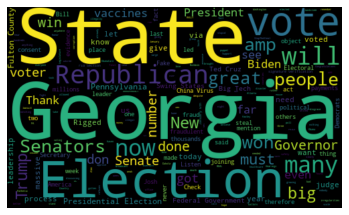

In [ ]:
#word cloud trump

trumpword= ' '.join([twts for twts in trump_df['Tweets']])
trumpclude= WordCloud(width =500, height=300, random_state= 21,max_font_size=119).generate(trumpword)

plt.imshow(trumpclude,interpolation='bilinear')
plt.axis('off')
plt.show()

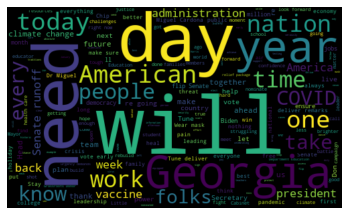

In [ ]:
#word cloud biden

bidenword= ' '.join([twts for twts in biden_df['Tweets']])
bidenclude= WordCloud(width =500, height=300, random_state= 21,max_font_size=119).generate(bidenword)

plt.imshow(bidenclude,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
  # positive tweet by trump
c=1
sortedt = trump_df.sort_values(by=["polarity"])
for i in range (0,sortedt.shape[0]):
    if(sortedt['S_analysis'][i]=='Positive'):
      print(str(c)+')'+sortedt['Tweets'][i])
      print()
      c=c+1
    if(c==11):
      break

1)Republicans in Georgia must be careful of the political corruption in Fulton County, which is rampant. The Governor, , and his puppet Lt. Governor, , have done less than nothing. They are a disgrace to the great people of Georgia!

2)The vaccines are being delivered to the states by the Federal Government far faster than they can be administered!

3): NEW: A growing number of Republican senators — led by Ted Cruz — are set to announce today they also will object to certi…

4): Glad to see more Senators joining the fight on JAN6. I hope many more will listen to their constituents and act

5)So true. Thanks Josh! 

6)An attempt to steal a landslide win. Can’t let it happen! 

7)...And after they see the facts, plenty more to come...Our Country will love them for it! StopTheSteal 

8)Civil War: Tucker Carlson Hits His Own Network in Epic Post-Election Monologue 

9): We never, ever paid to get our people home. Appeasement invites more hostage-taking. We restored America's credibility. N

In [ ]:
  # negative tweet by trump
c=1
sortedt = trump_df.sort_values(by=["polarity"],ascending='False')
for i in range (0,sortedt.shape[0]):
    if(sortedt['S_analysis'][i]=='Negative'):
      print(str(c)+')'+sortedt['Tweets'][i])
      print()
      c=c+1
    if(c==11):
      break

1)The number of cases and deaths of the China Virus is far exaggerated in the United States because of ’s ridiculous method of determination compared to other countries, many of whom report, purposely, very inaccurately and low. “When in doubt, call it Covid.” Fake News!

2)Wow, I guess it’s not good to go against a President who everyone in Georgia knows got you into office! 

3): You know that sound when a sheet of glass begins to shatter, but slowly? That first hard CRACK!!! Then it spiders out? Listen…

4)Why haven’t they done signature verification in Fulton County, Georgia. Why haven’t they deducted all of the dead people who “voted”, illegals who voted, non Georgia residents who voted, and tens of thousands of others who voted illegally, from the final vote tally?

5)For historical purposes remember, I was able to get rid of the INDIVIDUAL MANDATE, the most unpopular and expensive part of ObamaCare. You are no longer forced to pay a fortune for the “privilege” of NOT getting bad

In [ ]:
  # positive tweet by biden
c=1
sortedt = biden_df.sort_values(by=["polarity"])
for i in range (0,sortedt.shape[0]):
    if(sortedt['S_analysis'][i]=='Positive'):
      print(str(c)+')'+sortedt['Tweets'][i])
      print()
      c=c+1
    if(c==11):
      break

1)Floyd Little and I were students at Syracuse University together. And over the years, I got to know the man behind the number. He was full of character, decency, and integrity. I will miss my friend. The entire Biden family sends our love to DeBorah and the Little family. 

2)Let me be clear: The Biden-Harris Administration will spare no effort to make sure people are getting vaccinated. 

3)The challenges we face as a nation will not disappear overnight, but as we look forward to the start of a new year, I’m filled with fresh hope about the possibilities of better days to come. 

After a year of pain and loss, let us unite, heal, and rebuild in 2021.

4)We have less than one week to do everything in our power to help Jon Ossoff and Raphael Warnock win their Senate runoff elections in Georgia. These races will not only determine the fate of the Senate but the future of our country. Chip in today: 

5)Georgia — Today is your last chance to vote early ahead of next week’s Senate runoff

In [ ]:
  # negative tweet by biden
c=1
sortedt = biden_df.sort_values(by=["polarity"],ascending='False')
for i in range (0,sortedt.shape[0]):
    if(sortedt['S_analysis'][i]=='Negative'):
      print(str(c)+')'+sortedt['Tweets'][i])
      print()
      c=c+1
    if(c==11):
      break

1)It’s the final weekend before the Georgia Senate runoffs, which means we have just a few days left to do everything we can to flip the Senate. If you have a few minutes, sign up to make calls and let’s get to work: 

2)The next few weeks and months are going to be a very tough period for our nation — maybe the toughest of the whole pandemic. 

But we are going to get through it. Brighter days are coming, but it’s going to take all the grit and determination we have as Americans to do it.

3)This year, we’ve painfully learned the cost of being unprepared for a pandemic.
 
If we aren’t investing with our partners around the world, we’re undermining our ability to defeat COVID-19 and leaving ourselves vulnerable to the next deadly epidemic.

4)This afternoon, I was briefed by members of my national security and foreign policy agency review teams. Tune in as I deliver remarks on the challenges our administration will inherit. 

5)We’ve gotten through tough times before in this nation — a

In [ ]:
#percentage of trump positive twieet
pt=trump_df[trump_df.S_analysis=='Positive']
pt=pt['Tweets']
print("percentage of trump's possitive tweets :")
round( (pt.shape[0] /trump_df.shape[0])*100,1)




percentage of trump's possitive tweets :


36.0

In [ ]:
#percentage of trump negative  twieet
pt=trump_df[trump_df.S_analysis=='Negative']
pt=pt['Tweets']
print("percentage of trump's Negative tweets :")
round( (pt.shape[0] /trump_df.shape[0])*100,1)

percentage of trump's Negative tweets :


19.0

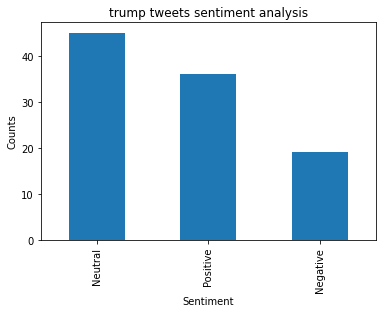

In [ ]:
#plot vidualization 
plt.title('trump tweets sentiment analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
trump_df['S_analysis'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
#percentage of biden positive twieet
pt=biden_df[biden_df.S_analysis=='Positive']
pt=pt['Tweets']
print("percentage of biden's possitive tweets :")
round( (pt.shape[0] /biden_df.shape[0])*100,1)

percentage of biden's possitive tweets :


53.0

In [ ]:
#percentage of biden negative  twieet
pt=biden_df[biden_df.S_analysis=='Negative']
pt=pt['Tweets']
print("percentage of biden's Negative tweets :")
round( (pt.shape[0] /biden_df.shape[0])*100,1)

percentage of biden's Negative tweets :


15.0

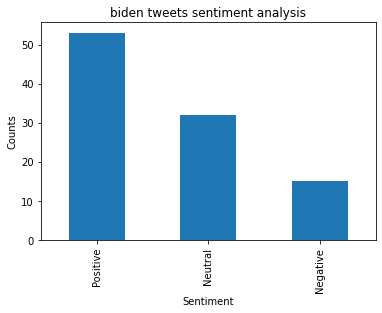

In [ ]:
#plot vidualization 
plt.title('biden tweets sentiment analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
biden_df['S_analysis'].value_counts().plot(kind='bar')
plt.show()

now we will do sentiment analysis of live data

In [ ]:
class MyListener(StreamListener):
    def __init__(self, api=None):
        super(StreamListener, self).__init__()
        self.num_tweets = 0

    def on_data(self, data):
        try:
            with open('/content/drive/MyDrive/nlp/tw.dat', 'a') as f:
                tweet = json.loads(data)
                if tweet["lang"] == "en" and tweet["user"]["location"] == "United States":
                    if self.num_tweets < 500:
                        print(json.dumps(tweet["text"], indent=4))
                        f.write(json.dumps(tweet["text"]))
                        f.write("\n")
                        self.num_tweets += 1
                    return True

        except BaseException as e:
            print("Error on_data: %s" % str(e))
        return True

    def on_error(self, status):
        print(status)
        return True

    def on_status(self, status):
        if status.retweeted_status:
            return
        print(status)


lines below should be uncomented to capture live stream data related trump , biden , election 2020.

as live 500 tweets takes around 25-30 min to get loaded that's why , we are useing pre recorded data which is captured on 9-1-2020 from live stream tweets .

In [ ]:
# twt_stream = Stream(auth, MyListener(),tweet_mode='extended')
# twt_stream.filter(track=['USElection2020',	'#Election2020 ','#election2020','#uselection','trump','#trump','JoeBiden','#Biden','#TrumpIsLosing',' #Trumpmeltdown'])

our tweets are recorded in tw.dat ,in code below which will be transfered to tw.csv type

In [ ]:
import csv

with open("/content/drive/MyDrive/nlp/tw.dat") as infile, open("/content/drive/MyDrive/nlp/tw.csv", "w") as outfile:
    csv_writer = csv.writer(outfile)
    prev = ''
    csv_writer.writerow(['Tweets'])
    for line in infile.read().splitlines():
        csv_writer.writerow([line, prev])
        prev = line

as we can see 3 data path is related to this programming , to avoid any error user may upload the prerecorded tw.dat (will be provided)file to drive and past the file path in [/content/drive/MyDrive/nlp/tw.dat] place.
and a empty csv file path in ["/content/drive/MyDrive/nlp/tw.csv"] this place 

In [ ]:
#load the csv data 
live_t  = pd.read_csv("/content/drive/MyDrive/nlp/tw.csv")

live_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, "RT @ABCWorldNews: CALLS TO REMOVE: Top Democrats are calling for Pres. Trump\u2019s impeachment or for Vice President Pence to use the 25th Amen\u2026" to "RT @Daytobehappy: Used to wonder how the Bushes could be Republicans and be such good friends with the Clintons and I have to ask how Pence\u2026"
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweets  499 non-null    object
dtypes: object(1)
memory usage: 7.8+ KB


In [ ]:
#changing data type
live_t['Tweets']=live_t['Tweets'].apply(str)
#calling data cleaning function 
live_t['Tweets']=live_t['Tweets'].apply(cleantext)
live_t.head(10)

,Tweets
"""RT @ABCWorldNews: CALLS TO REMOVE: Top Democrats are calling for Pres. Trump\u2019s impeachment or for Vice President Pence to use the 25th Amen\u2026""",nan
"""RT @SykesCharlie: So to summarize today\u2019s Trump news: https://t.co/70ecCfP6fX""",CALLS TO REMOVE Top Democrats are calling for...
"""RT @EmeraldRobinson: President Trump should declassify and release the Spygate documents today.""",So to summarize today Trump news
"""RT @Pink_About_it: Trump\u2019s greatest legacy is that he revealed the depths of corruption that is the government and media \n\nNo one will ever\u2026""",President Trump should declassify and release...
"""@MaryLTrump If he gets impeached, Pence will pull a Nixon/Ford card and gets the pardon he wants. Don't impeach him\u2026 https://t.co/3hXMXi4iJL""",_About_it Trump greatest legacy is that he re...
"""RT @VicToensing: If Democrats want smooth transition to @JoeBiden, why are they demanding @VP Pence to invoke 25th Amendment to remove @rea\u2026""","If he gets impeached, Pence will pull a Nixon..."
"""RT @EdMarkey: .@MsPackyetti is right. The attack on the Capitol was white supremacy in action.""","If Democrats want smooth transition to , why ..."
"""@PapaCorrupto Died for a Trump flag instead of the American flag. https://t.co/G5tb90xtSd""",. is right. The attack on the Capitol was whi...
"""RT @MignonetteBooks: @fordm @_ReaalAmerican_ I\u2019m so very happy Dominion has sued! Hope they sue more of the trump traitors! Especially Giu\u2026""",Died for a Trump flag instead of the American...
"""RT @AshaRangappa_: Trump, his GOP supporters like Devin Nunes, and his followers claimed that Andrew McCabe shouldn\u2019t have been on the Trum\u2026""",@_ReaalAmerican_ I so very happy Dominion h...


In [ ]:
live_t['subjectivity']=live_t['Tweets'].apply(data_subjectivity)
live_t['polarity']=live_t['Tweets'].apply(data_polarity)
live_t['S_analysis']=live_t['polarity'].apply(data_sentiment)
live_t.head()

,Tweets,subjectivity,polarity,S_analysis
"""RT @ABCWorldNews: CALLS TO REMOVE: Top Democrats are calling for Pres. Trump\u2019s impeachment or for Vice President Pence to use the 25th Amen\u2026""",nan,0.0,0.0,Neutral
"""RT @SykesCharlie: So to summarize today\u2019s Trump news: https://t.co/70ecCfP6fX""",CALLS TO REMOVE Top Democrats are calling for...,0.5,0.5,Positive
"""RT @EmeraldRobinson: President Trump should declassify and release the Spygate documents today.""",So to summarize today Trump news,0.0,0.0,Neutral
"""RT @Pink_About_it: Trump\u2019s greatest legacy is that he revealed the depths of corruption that is the government and media \n\nNo one will ever\u2026""",President Trump should declassify and release...,0.0,0.0,Neutral
"""@MaryLTrump If he gets impeached, Pence will pull a Nixon/Ford card and gets the pardon he wants. Don't impeach him\u2026 https://t.co/3hXMXi4iJL""",_About_it Trump greatest legacy is that he re...,1.0,1.0,Positive


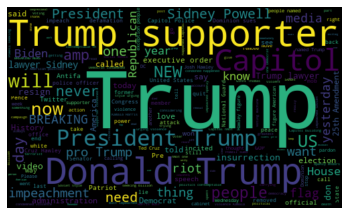

In [ ]:
#word cloud of live steam data

word= ' '.join([twts for twts in live_t['Tweets']])
clude= WordCloud(width =500, height=300, random_state= 21,max_font_size=119).generate(word)

plt.imshow(clude,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
  # positive tweet in live stram data
c=1
sortedt = live_t.sort_values(by=["polarity"])
for i in range (0,sortedt.shape[0]):
    if(sortedt['S_analysis'][i]=='Positive'):
      print(str(c)+')'+sortedt['Tweets'][i])
      print()
      c=c+1
    if(c==11):
      break

1) If you don  see a problem with Trump being silenced across numerous social media platforms, you  not paying close enough att 

2) As Trump moves to the Military Control Center he states there will be a peaceful transition of power\n\nAs an ex Seal Team me 

3) REMINDER President Trump called for peace and for protesters to go home and social media deleted it.

4) REMINDER President Trump called for peace and for protesters to go home and social media deleted it.

5) As I said last night Donald Trump is a clear and present danger to our democracy. His Cabinet must use the 25th  to 

6)Why you lying? Whose the Republican senators who are willing to go down in history as impeaching Trump?

7) we need your passion, your leadership, your powerful statements everyday between now and when  

8) For five years now I  spent way too much of my time yelling and screaming about the danger of Donald Trump. I take abs 

9)Don  care, go straight to jail.

10) Just 2 days prior to the terrorist att

In [ ]:
  # negative  tweet in live stram data
c=1
sortedt = live_t.sort_values(by=["polarity"],ascending='False')
for i in range (0,sortedt.shape[0]):
    if(sortedt['S_analysis'][i]=='Negative'):
      print(str(c)+')'+sortedt['Tweets'][i])
      print()
      c=c+1
    if(c==11):
      break

1)The worst president ever.

2) I  joining my colleagues in sponsoring articles of impeachment. Trump's vile rhetoric and terrifying actions encouraged a v 

3) I  joining my colleagues in sponsoring articles of impeachment. Trump's vile rhetoric and terrifying actions encouraged a v 

4) I find it disgusting that Ted Cruz, Josh Hawley, and Donald Trump, the cult leaders who incited the mob, can so hypocriticall 

5) I find it disgusting that Ted Cruz, Josh Hawley, and Donald Trump, the cult leaders who incited the mob, can so hypocriticall 

6) I find it disgusting that Ted Cruz, Josh Hawley, and Donald Trump, the cult leaders who incited the mob, can so hypocriticall 

7)_silenced If i went to a Trump rally and he told me to be violent and riot....I wouldn  be violent and riot\n\nI  not a robot.....I 

8) Trump had just delivered the biggest parting gift to the Kremlin by inciting a violent insurrection. \n\n The storefront 

9) All those Republicans who secretly hate Trump have plen

In [ ]:
#percentage of live stram positive twieet
pt=live_t[live_t.S_analysis=='Positive']
pt=pt['Tweets']
print("percentage of biden's possitive tweets :")
round( (pt.shape[0] /live_t.shape[0])*100,1)

percentage of biden's possitive tweets :


29.0

In [ ]:
#percentage of live stram negative  twieet
pt=live_t[live_t.S_analysis=='Negative']
pt=pt['Tweets']
print("percentage of live_t's Negative tweets :")
round( (pt.shape[0] /live_t.shape[0])*100,1)

percentage of live_t's Negative tweets :


17.4

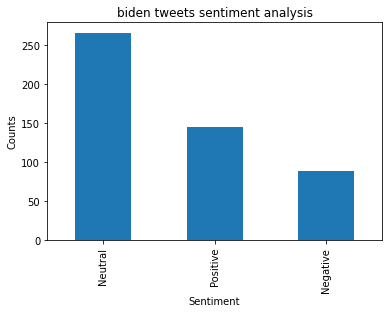

In [ ]:
#plot vidualization 
plt.title('biden tweets sentiment analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
live_t['S_analysis'].value_counts().plot(kind='bar')
plt.show()